In [187]:
# !pip install xarray

# Dataset Download & Extraction:

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt


In [3]:

# Load NetCDF dataset
file_path = "../data/WASP_LW_SENT2_MED_L1C_B_201506_202109_10m_6y_NRT_v1.0.nc"
dataset = xr.open_dataset(file_path)

# Check the dataset structure
dataset.dims, dataset.attrs['Conventions']

(FrozenMappingWarningOnValuesAccess({'n_filaments': 14374, 'box_dims': 4, 'n_max_pixels_fil': 2563, 'n_bands': 13}),
 'CF-1.6')

In [4]:
dataset

<xarray.Dataset> Size: 2GB
Dimensions:       (n_filaments: 14374, box_dims: 4, n_max_pixels_fil: 2563,
                   n_bands: 13)
Dimensions without coordinates: n_filaments, box_dims, n_max_pixels_fil, n_bands
Data variables:
    s2_product    (n_filaments) |S65 934kB ...
    dec_time      (n_filaments) float64 115kB ...
    x_centroid    (n_filaments) float32 57kB ...
    y_centroid    (n_filaments) float32 57kB ...
    lat_centroid  (n_filaments) float64 115kB ...
    lon_centroid  (n_filaments) float64 115kB ...
    n_pixels_fil  (n_filaments) float64 115kB ...
    limits        (n_filaments, box_dims) float32 230kB ...
    pixel_x       (n_filaments, n_max_pixels_fil) float32 147MB ...
    pixel_y       (n_filaments, n_max_pixels_fil) float32 147MB ...
    pixel_spec    (n_filaments, n_max_pixels_fil, n_bands) float32 2GB ...
Attributes: (12/22)
    title:                 Mediterranean Sentinel-2 Litter Windrows Catalogue...
    institution:           Barcelona Expert Center (BEC), ICM-CSIC, Barcelona...
    url:                   http://bec.icm.csic.es
    email:                 m.arias@icm.csic.es m.arias@zenithalblue.com
    copyright:             BEC research products are freely distributed. If t...
    reference:             https://doi.org/10.5281/zenodo.11045944
    ...                    ...
    geospatial_lat_max:    45.740728823657236
    geospatial_lat_units:  degrees north
    geospatial_lon_min:    -6.703167546213006
    geospatial_lon_max:    36.20086905862957
    geospatial_lon_units:  degrees east
    spectral_bands:        B01, B02, B03, B04, B05, B06, B07, B08, B8A, B09, ...

In [5]:
# for attribute, value in dataset.attrs.items():
#     print("attribute :",attribute, "\nvalue : ",value, '\n')

In [6]:
dataset.data_vars

Data variables:
    s2_product    (n_filaments) |S65 934kB ...
    dec_time      (n_filaments) float64 115kB ...
    x_centroid    (n_filaments) float32 57kB ...
    y_centroid    (n_filaments) float32 57kB ...
    lat_centroid  (n_filaments) float64 115kB ...
    lon_centroid  (n_filaments) float64 115kB ...
    n_pixels_fil  (n_filaments) float64 115kB ...
    limits        (n_filaments, box_dims) float32 230kB ...
    pixel_x       (n_filaments, n_max_pixels_fil) float32 147MB ...
    pixel_y       (n_filaments, n_max_pixels_fil) float32 147MB ...
    pixel_spec    (n_filaments, n_max_pixels_fil, n_bands) float32 2GB ...

In [7]:

dataset.data_vars['pixel_spec']
# dataset.data_vars['pixel_spec'].values

<xarray.DataArray 'pixel_spec' (n_filaments: 14374, n_max_pixels_fil: 2563,
                                n_bands: 13)> Size: 2GB
[478927306 values with dtype=float32]
Dimensions without coordinates: n_filaments, n_max_pixels_fil, n_bands
Attributes:
    long_name:    Pixel Spectra
    units:        reflectance
    description:  Spectral L1c (TOA) reflectance values for pixel and band on...

In [8]:
dataset.data_vars['pixel_spec'].attrs

{'long_name': 'Pixel Spectra',
 'units': 'reflectance',
 'description': 'Spectral L1c (TOA) reflectance values for pixel and band on the filament.'}

In [9]:
dataset.data_vars

Data variables:
    s2_product    (n_filaments) |S65 934kB ...
    dec_time      (n_filaments) float64 115kB ...
    x_centroid    (n_filaments) float32 57kB ...
    y_centroid    (n_filaments) float32 57kB ...
    lat_centroid  (n_filaments) float64 115kB ...
    lon_centroid  (n_filaments) float64 115kB ...
    n_pixels_fil  (n_filaments) float64 115kB ...
    limits        (n_filaments, box_dims) float32 230kB ...
    pixel_x       (n_filaments, n_max_pixels_fil) float32 147MB ...
    pixel_y       (n_filaments, n_max_pixels_fil) float32 147MB ...
    pixel_spec    (n_filaments, n_max_pixels_fil, n_bands) float32 2GB ...

In [10]:
dataset['pixel_spec'].values

array([[[0.1443, 0.123 , 0.0918, ..., 0.0008, 0.0041, 0.0026],
        [0.1443, 0.1219, 0.0924, ..., 0.0008, 0.0042, 0.0024],
        [0.1443, 0.1224, 0.0946, ..., 0.0008, 0.0052, 0.0033],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[0.1351, 0.0997, 0.0573, ..., 0.0002, 0.0021, 0.0022],
        [0.1351, 0.1009, 0.0572, ..., 0.0002, 0.0021, 0.0022],
        [0.139 , 0.1056, 0.062 , ..., 0.0004, 0.0033, 0.0025],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[0.1316, 0.1126, 0.1042, ..., 0.0005, 0.005 , 0.0032],
        [0.1329, 0.1187, 0.1084, ..., 0.0006, 0.0056, 0.0026],
        [0.1329, 0.1207, 0.1081, ..., 0.0006, 0.0081, 0.0035],
        ...,
        [   

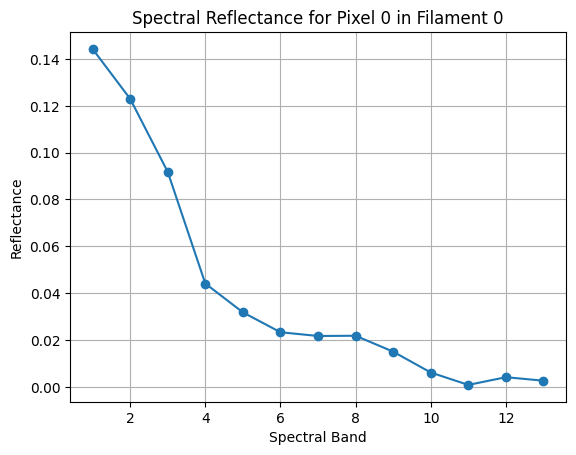

In [129]:
# Choose a specific filament and pixel index
filament_idx = 0
pixel_idx = 0

# Extract the spectral profile (all bands)
spectrum = pixel_spec[filament_idx, pixel_idx, :]

# Plot the reflectance curve
plt.plot(range(1, 14), spectrum, marker='o')
plt.xlabel("Spectral Band")
plt.ylabel("Reflectance")
plt.title(f"Spectral Reflectance for Pixel {pixel_idx} in Filament {filament_idx}")
plt.grid()
plt.show()


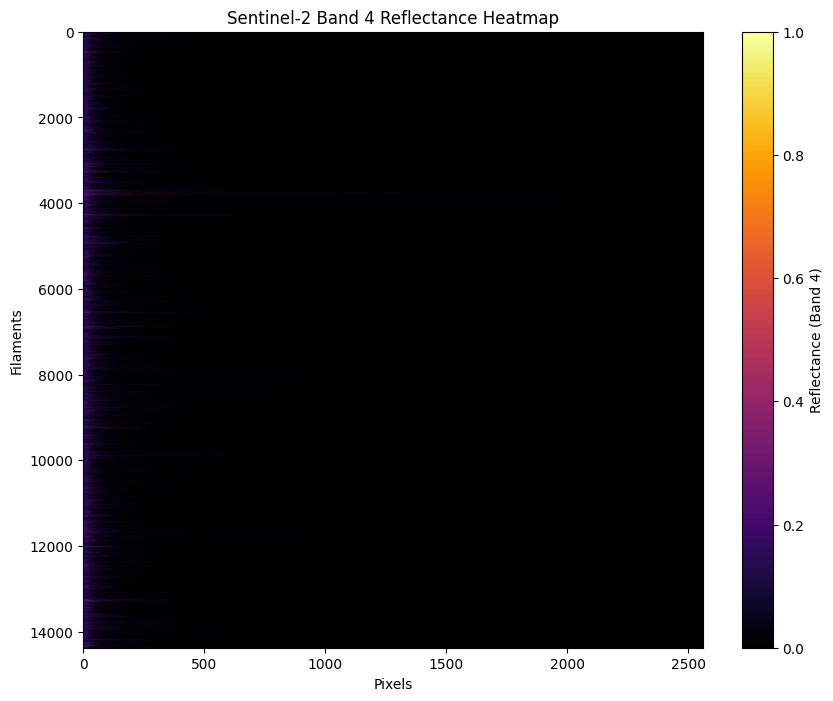

Unique values in Band 4: [0.         0.07183298 0.07289456 0.07324841 0.07466384 0.0750177
 0.07537155 0.07572541 0.07607927 0.07643313 0.07678698 0.07714084
 0.0774947  0.07784855 0.07820241 0.07855626 0.07891012 0.07926398
 0.07961784 0.0799717 ] ...


In [11]:

def clean_and_visualize_band(pixel_spec, band_index=0, nan_replacement=0, normalize=False):
    """
    Cleans NaN values, optionally normalizes the data, and visualizes a specified band.

    Parameters:
        pixel_spec (numpy.ndarray): The dataset containing pixel spectral values (n_filaments, n_max_pixels_fil, n_bands).
        band_index (int): The index of the band to visualize.
        nan_replacement (float): The value to replace NaNs with (default is 0).
        normalize (bool): Whether to normalize values between 0 and 1.

    Returns:
        numpy.ndarray: Cleaned band data.
    """

    # Extract the selected band data
    image_data = pixel_spec[:, :, band_index]
    
    # Replace NaN values
    image_data_cleaned = np.nan_to_num(image_data, nan=nan_replacement)
    
    # Optional: Normalize values to range [0,1]
    if normalize:
        min_val = np.min(image_data_cleaned)
        max_val = np.max(image_data_cleaned)
        if max_val > min_val:
            image_data_cleaned = (image_data_cleaned - min_val) / (max_val - min_val)

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(image_data_cleaned, cmap='inferno', aspect='auto')  
    plt.colorbar(label=f"Reflectance (Band {band_index + 1})")
    plt.title(f"Sentinel-2 Band {band_index + 1} Reflectance Heatmap")
    plt.xlabel("Pixels")
    plt.ylabel("Filaments")
    plt.show()

    # Print unique values
    unique_values = np.unique(image_data_cleaned)
    print(f"Unique values in Band {band_index + 1}: {unique_values[:20]} ...")  # Show first 20 unique values

    return image_data_cleaned

# Example usage
pixel_spec=dataset['pixel_spec'].values
cleaned_band_4 = clean_and_visualize_band(pixel_spec, band_index=3, normalize=True)  # Band 4 (index 3)

In [110]:
import numpy as np

# Check NaN count in the entire dataset
nan_count = np.isnan(dataset['pixel_spec']).sum().item()
print(f"Total NaN values in pixel_spec: {nan_count}")

# Check NaN percentage
total_values = dataset['pixel_spec'].size
nan_percentage = (nan_count / total_values) * 100
print(f"Percentage of NaN values: {nan_percentage:.2f}%")



Total NaN values in pixel_spec: 466647610
Percentage of NaN values: 97.44%


In [113]:
# Find min and max values
min_value = np.nanmin(dataset['pixel_spec'])
max_value = np.nanmax(dataset['pixel_spec'])

print(f"Min Reflectance Value: {min_value}")
print(f"Max Reflectance Value: {max_value}")

# Check if any values are out of range
out_of_range = np.logical_or(dataset['pixel_spec'] < 0, dataset['pixel_spec'] > 1).sum().item()
print(f"Number of out-of-range values: {out_of_range}")


Min Reflectance Value: 0.0
Max Reflectance Value: 0.31150001287460327
Number of out-of-range values: 0


In [12]:

# dataset.data_vars['y_centroid'].plot.hist()
# dataset.data_vars['dec_time'].plot.step()
# dataset.data_vars['n_pixels_fil'].plot.step()
# plt.show()

# xr.plot.line(dataset.data_vars['x_centroid'],y='n_filaments' ,yincrease=False)
# xr.plot.line(dataset.data_vars['y_centroid'],y='n_filaments' ,yincrease=False)
# plt.legend()
# plt.show()

# Visualization

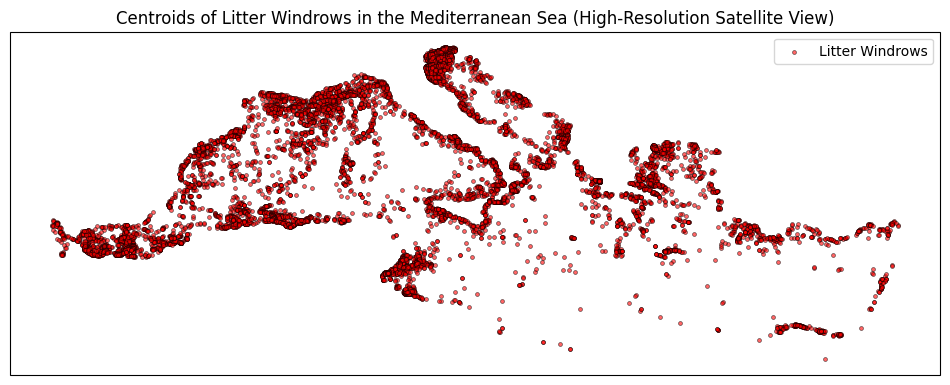

In [123]:
lat_centroid = dataset['lat_centroid'].values
lon_centroid = dataset['lon_centroid'].values
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.scatter(lon_centroid, lat_centroid, c='red', s=8, alpha=0.6, edgecolors="black", linewidth=0.5, transform=ccrs.PlateCarree(), label="Litter Windrows")
# Title and legend
ax.set_title("Centroids of Litter Windrows in the Mediterranean Sea (High-Resolution Satellite View)")
plt.legend()
plt.show()

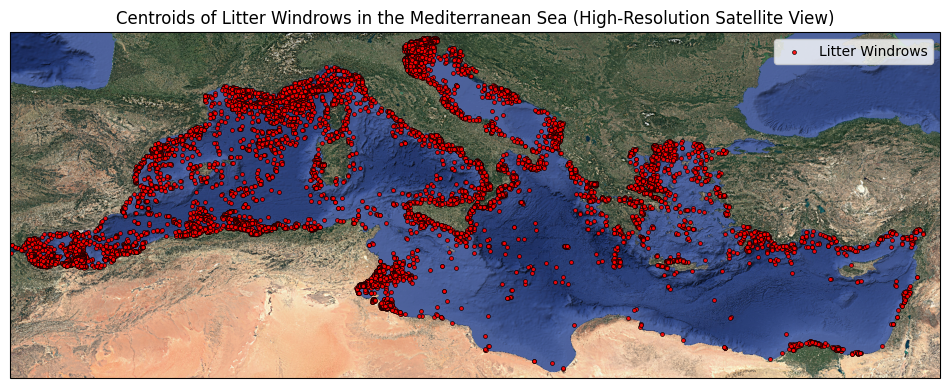

In [68]:


# Assuming dataset is a dictionary-like structure or xarray Dataset
lat_centroid = dataset['lat_centroid'].values
lon_centroid = dataset['lon_centroid'].values

# Define Mediterranean Sea boundaries
lat_min, lat_max = 30, 46
lon_min, lon_max = -6, 37

# Apply the mask
mask = (lat_centroid >= lat_min) & (lat_centroid <= lat_max) & \
       (lon_centroid >= lon_min) & (lon_centroid <= lon_max)

# Filtered data
lat_med = lat_centroid[mask]
lon_med = lon_centroid[mask]

# High-resolution ESRI satellite map
satellite = cimgt.GoogleTiles(style="satellite")  # You can change this to other providers below Note it will take around 2 Minutes to be processed 

# Create figure
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})



ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add satellite imagery as background
ax.add_image(satellite, 10)  # Higher zoom for better resolution (try to 10 for more detail)

# Scatter plot of centroids with improved visibility
ax.scatter(lon_med, lat_med, c='red', s=8, alpha=0.9, edgecolors="black", linewidth=0.5, transform=ccrs.PlateCarree(), label="Litter Windrows")

# Title and legend
ax.set_title("Centroids of Litter Windrows in the Mediterranean Sea (High-Resolution Satellite View)")
plt.legend()
plt.show()
